In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [9]:
data=pd.read_csv("creditcard.csv")


In [11]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
data.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [19]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define your X and y first
X = data.drop(columns=['Class'])  # Features
y = data['Class']                 # Target (0 = legit, 1 = fraud)

# Split BEFORE applying SMOTE (to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new class distribution
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))


Before SMOTE: Counter({0: 227451, 1: 394})
After SMOTE: Counter({0: 227451, 1: 227451})


In [24]:
#0-->Normal Transaction
#1-->Fraudulent Transaction

In [26]:
legit=data[data.Class==0]
fraud=data[data.Class==1]
print(legit.shape,fraud.shape)

(284315, 31) (492, 31)


In [28]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [30]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [32]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [34]:
legit_sample=legit.sample(n=492)

In [36]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)
new_dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
230863,146510.0,-0.588028,0.848694,-0.609307,0.012985,0.152564,-0.844817,0.885853,-0.068691,-1.770021,...,-0.114069,0.170091,-0.088304,-0.100148,-0.357276,-0.566503,-0.121512,0.151785,52.44,0
161416,114166.0,-0.897920,0.051948,2.637189,-1.034545,-0.552805,0.831833,0.742524,-0.093297,1.065269,...,0.093087,0.497035,-0.339564,0.584020,0.282264,0.285621,-0.393135,-0.400614,142.80,0
157902,110596.0,1.911591,-0.483204,-0.786702,0.406112,-0.794714,-1.555994,-0.063217,-0.408278,2.308857,...,0.032474,0.479034,0.126449,0.917742,-0.165726,1.366930,-0.163815,-0.073747,60.00,0
64459,51155.0,-1.444151,1.093436,1.482977,0.442207,-1.823509,-0.395665,-0.162708,0.831990,-0.005291,...,0.133894,0.417164,0.191037,0.979337,-0.563795,0.176949,0.075556,0.064016,112.75,0
224181,143684.0,2.015641,-1.391903,-1.022975,-1.206287,-0.605307,0.532764,-1.157631,0.162563,-0.039392,...,0.428696,0.987624,-0.056874,-0.315559,-0.114340,-0.062467,-0.014028,-0.042163,109.00,0


In [38]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [40]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97298.709350,0.039005,-0.021099,0.087744,0.014708,0.069462,-0.134474,0.091337,0.031564,-0.086482,...,-0.021677,0.022529,0.079298,0.018673,-0.017875,0.004217,0.021836,-0.008672,-0.001623,76.915955
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [42]:
x=new_dataset.drop(columns='Class',axis=1)
y=new_dataset['Class']

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


In [46]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print("Training data accuracy:",training_data_accuracy*100)

Training data accuracy: 93.90088945362135


In [50]:
x_test_prediction=model.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)
print("Testing data accuracy:",testing_data_accuracy*100)

Testing data accuracy: 95.43147208121827


In [53]:
# Import everything
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load data
df = pd.read_csv('creditcard.csv')

# Train-test split
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE only on train data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [54]:
# Sample data (only 10,000 rows out of ~284,000)
df_sampled = df.sample(n=10000, random_state=42)

X = df_sampled.drop(columns=['Class'])
y = df_sampled['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# SMOTE on sampled data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Fewer trees + shallower depth = faster
rf_model = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=42)
rf_model.fit(X_train_sm, y_train_sm)

rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Report (FAST version):")
print(classification_report(y_test, rf_preds))
print("AUC Score:", roc_auc_score(y_test, rf_probs))


Random Forest Report (FAST version):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1997
           1       0.75      1.00      0.86         3

    accuracy                           1.00      2000
   macro avg       0.88      1.00      0.93      2000
weighted avg       1.00      1.00      1.00      2000

AUC Score: 1.0


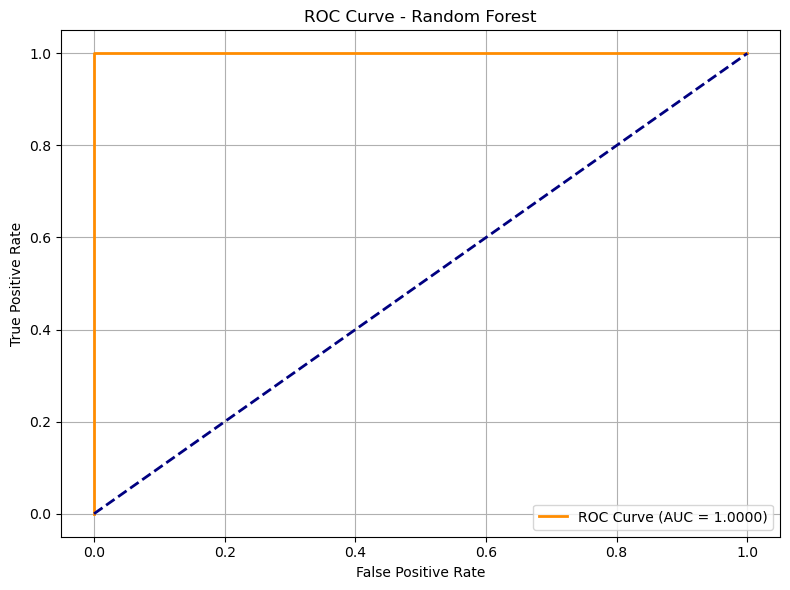

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()


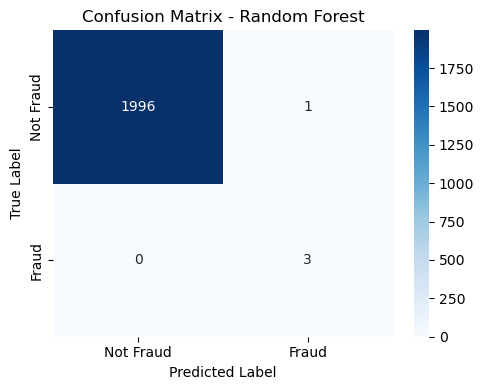

In [61]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [63]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Fast configuration: fewer trees, max depth limited
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=30,        # Number of trees
    max_depth=4,            # Tree depth
    learning_rate=0.1,      # Fast learning
    subsample=0.8,          # Row sampling
    colsample_bytree=0.8,   # Feature sampling
    random_state=42
)

xgb_model.fit(X_train_sm, y_train_sm)

xgb_preds = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Report:")
print(classification_report(y_test, xgb_preds))
print("AUC Score:", roc_auc_score(y_test, xgb_probs))


XGBoost Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1997
           1       0.50      1.00      0.67         3

    accuracy                           1.00      2000
   macro avg       0.75      1.00      0.83      2000
weighted avg       1.00      1.00      1.00      2000

AUC Score: 0.9998330829577701


C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:44:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


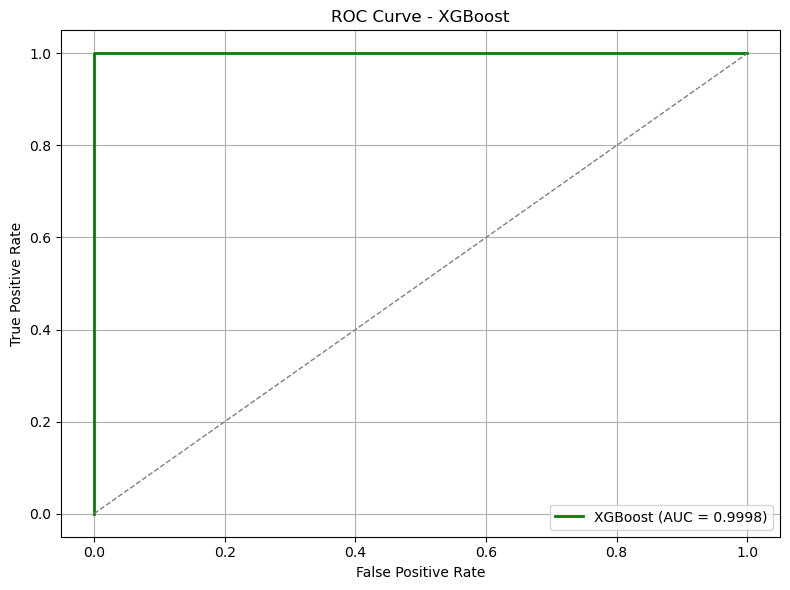

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.title('ROC Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()


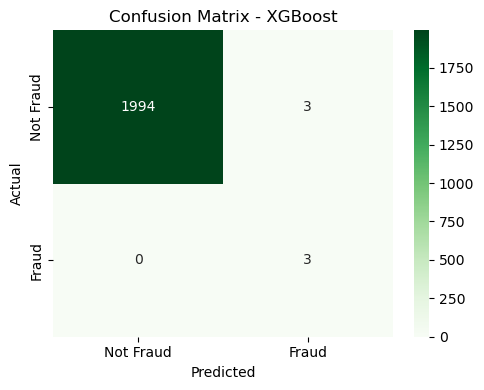

In [67]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_xgb = confusion_matrix(y_test, xgb_preds)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [69]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score

# Extract precision, recall, f1, auc from both
metrics_comparison = {
    "Random Forest": {
        "Precision": classification_report(y_test, rf_preds, output_dict=True)["1"]["precision"],
        "Recall": classification_report(y_test, rf_preds, output_dict=True)["1"]["recall"],
        "F1-Score": classification_report(y_test, rf_preds, output_dict=True)["1"]["f1-score"],
        "AUC": roc_auc_score(y_test, rf_probs)
    },
    "XGBoost": {
        "Precision": classification_report(y_test, xgb_preds, output_dict=True)["1"]["precision"],
        "Recall": classification_report(y_test, xgb_preds, output_dict=True)["1"]["recall"],
        "F1-Score": classification_report(y_test, xgb_preds, output_dict=True)["1"]["f1-score"],
        "AUC": roc_auc_score(y_test, xgb_probs)
    }
}

metrics_df = pd.DataFrame(metrics_comparison).T
print("📊 Model Comparison Table:")
print(metrics_df)


📊 Model Comparison Table:
               Precision  Recall  F1-Score       AUC
Random Forest       0.75     1.0  0.857143  1.000000
XGBoost             0.50     1.0  0.666667  0.999833


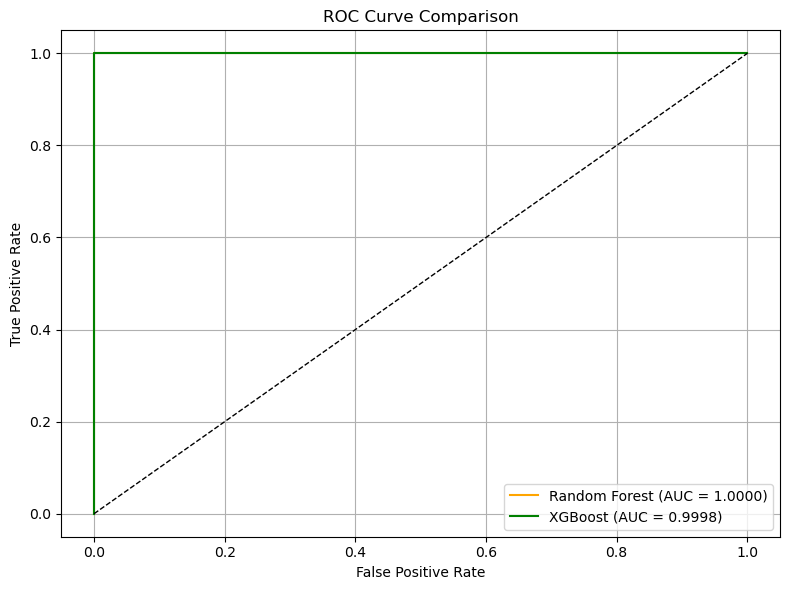

In [71]:
# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_probs):.4f})', color='orange')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, xgb_probs):.4f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()


In [73]:
!pip install shap


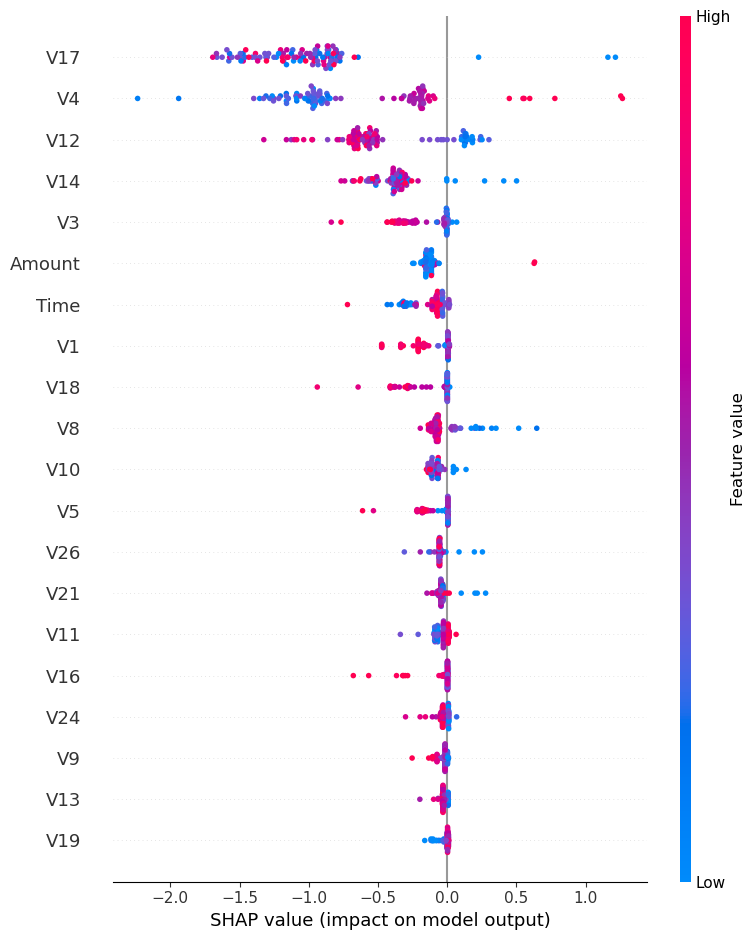

In [75]:
import shap

# Initialize explainer
explainer = shap.TreeExplainer(xgb_model)

# Explain a subset (100 rows for speed)
shap_values = explainer.shap_values(X_test.iloc[:100])

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test.iloc[:100])


In [77]:
# Pick a specific transaction
i = 5  # change to any index
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[i], X_test.iloc[i])


In [79]:
import joblib
joblib.dump(xgb_model, "model_xgb.pkl")


['model_xgb.pkl']